In [1]:
# ============================================================================
# CELL 1: Setup and Environment Check
# ============================================================================
import sys
import os
import torch
import numpy as np
import pandas as pd

# Kaggle paths
INPUT_DATA = '/kaggle/input/rlforfin/data'
INPUT_MODELS = '/kaggle/input/m/pranshudesai/rlforfin/pytorch/default/1'
WORKING_DIR = '/kaggle/working'

# Create output directories
os.makedirs(f'{WORKING_DIR}/data', exist_ok=True)
os.makedirs(f'{WORKING_DIR}/models', exist_ok=True)
os.makedirs(f'{WORKING_DIR}/models/ppo_checkpoints', exist_ok=True)
os.makedirs(f'{WORKING_DIR}/models/ppo_best', exist_ok=True)
os.makedirs(f'{WORKING_DIR}/models/sac_checkpoints', exist_ok=True)
os.makedirs(f'{WORKING_DIR}/models/sac_best', exist_ok=True)
os.makedirs(f'{WORKING_DIR}/results', exist_ok=True)
os.makedirs(f'{WORKING_DIR}/logs/ppo', exist_ok=True)
os.makedirs(f'{WORKING_DIR}/logs/sac', exist_ok=True)
os.makedirs(f'{WORKING_DIR}/logs/ppo_eval', exist_ok=True)
os.makedirs(f'{WORKING_DIR}/logs/sac_eval', exist_ok=True)

# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

# Install required packages
print("\nInstalling packages...")
os.system('pip install -q gymnasium stable-baselines3[extra] yfinance matplotlib seaborn transformers datasets')

print("\nSetup complete!")
print(f"Working directory: {WORKING_DIR}")
print(f"Input data: {INPUT_DATA}")
print(f"Input models: {INPUT_MODELS}")

Using device: cpu

Installing packages...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.4 MB/s eta 0:00:00

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
kaggle-environments 1.17.6 requires shimmy>=1.2.1, but you have shimmy 1.1.0 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dopamine-rl 4.1.2 requires ale-py>=0.10.1, but you have ale-py 0.8.1 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
bigframes 2.8.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.8.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.



Setup complete!
Working directory: /kaggle/working
Input data: /kaggle/input/rlforfin/data
Input models: /kaggle/input/m/pranshudesai/rlforfin/pytorch/default/1


/tmp/ipykernel_36/2539511383.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2015-01-01', end='2024-12-31', progress=False)


Column names: ['Date', 'Adj Close_AAPL', 'Close_AAPL', 'Close_ABBV', 'Close_ABT'] ...

Data downloaded!
Training: 1511 days (2015-01-02 00:00:00 to 2020-12-31 00:00:00)
Testing: 1004 days (2021-01-04 00:00:00 to 2024-12-30 00:00:00)

Number of assets: 50
Asset tickers: ['Close_AAPL', 'Close_MSFT', 'Close_GOOGL', 'Close_AMZN', 'Close_NVDA']...


<Figure size 1600x800 with 0 Axes>

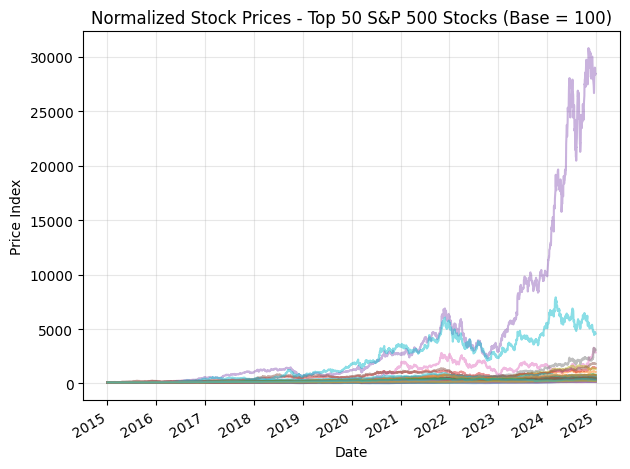


Visualization saved to /kaggle/working/results/stock_prices.png


In [2]:
# ============================================================================
# CELL 2: Data Download and Preparation
# ============================================================================
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# Top 50 S&P 500 stocks by market cap
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA',
    'META', 'TSLA', 'BRK-B', 'LLY', 'V',
    'UNH', 'WMT', 'XOM', 'JPM', 'MA',
    'JNJ', 'PG', 'AVGO', 'HD', 'ORCL',
    'CVX', 'MRK', 'COST', 'ABBV', 'KO',
    'NFLX', 'BAC', 'PEP', 'CRM', 'AMD',
    'TMO', 'MCD', 'CSCO', 'ACN', 'LIN',
    'ABT', 'WFC', 'DHR', 'PM', 'ADBE',
    'GE', 'INTU', 'TXN', 'QCOM', 'VZ',
    'CAT', 'CMCSA', 'IBM', 'AMGN', 'NEE'
]

print("Downloading stock data...")
data = yf.download(tickers, start='2015-01-01', end='2024-12-31', progress=False)

# Handle MultiIndex columns
data.columns = ['_'.join(col).strip() for col in data.columns.values]
data = data.reset_index()

print("Column names:", data.columns.tolist()[:5], "...")

# Extract close prices
close_prices = data[['Date'] + [f'Close_{ticker}' for ticker in tickers]]

# Handle missing data - FIXED for pandas 2.0+
close_prices = close_prices.ffill().bfill()

# Save
close_prices.to_csv(f'{WORKING_DIR}/data/stock_prices.csv', index=False)

# Split train/test
train = close_prices.set_index('Date')[:'2020-12-31']
test = close_prices.set_index('Date')['2021-01-01':]

train.to_csv(f'{WORKING_DIR}/data/train_data.csv')
test.to_csv(f'{WORKING_DIR}/data/test_data.csv')

print(f"\nData downloaded!")
print(f"Training: {train.shape[0]} days ({train.index[0]} to {train.index[-1]})")
print(f"Testing: {test.shape[0]} days ({test.index[0]} to {test.index[-1]})")
print(f"\nNumber of assets: {len(train.columns)}")
print(f"Asset tickers: {list(train.columns)[:5]}...")

# Visualization
plt.figure(figsize=(16, 8))
normalized = close_prices.set_index('Date') / close_prices.set_index('Date').iloc[0] * 100
normalized.plot(alpha=0.5, legend=False)
plt.title('Normalized Stock Prices - Top 50 S&P 500 Stocks (Base = 100)')
plt.ylabel('Price Index')
plt.xlabel('Date')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(f'{WORKING_DIR}/results/stock_prices.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved to {WORKING_DIR}/results/stock_prices.png")

In [3]:
# ============================================================================
# CELL 3: Portfolio Environment
# ============================================================================
import gymnasium as gym
import numpy as np
import pandas as pd
from gymnasium import spaces

class PortfolioEnv(gym.Env):
    """
    Custom Portfolio Optimization Environment
    """

    def __init__(self, data_path, initial_cash=10000,
                 transaction_cost=0.001, reward_type='sharpe',
                 lookback_window=20):
        super().__init__()

        # Load data
        self.data = pd.read_csv(data_path, index_col=0, parse_dates=True)
        self.n_assets = len(self.data.columns)
        self.initial_cash = initial_cash
        self.transaction_cost = transaction_cost
        self.reward_type = reward_type
        self.lookback_window = lookback_window

        # Calculate returns
        self.returns = self.data.pct_change().fillna(0)

        # State: [normalized prices, returns, current weights, cash ratio]
        obs_dim = self.n_assets * 3 + 1
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(obs_dim,), dtype=np.float32
        )

        # Action: portfolio weights
        self.action_space = spaces.Box(
            low=0, high=1, shape=(self.n_assets,), dtype=np.float32
        )

        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)

        self.current_step = self.lookback_window
        self.cash = self.initial_cash
        self.holdings = np.zeros(self.n_assets)
        self.portfolio_values = [self.initial_cash]
        self.returns_history = []

        return self._get_observation(), {}

    def _get_observation(self):
        # Normalized prices
        current_prices = self.data.iloc[self.current_step].values
        base_prices = self.data.iloc[self.current_step - self.lookback_window].values
        normalized_prices = current_prices / (base_prices + 1e-8)

        # Recent returns (moving average)
        recent_returns = self.returns.iloc[
            max(0, self.current_step - 5):self.current_step
        ].mean().values

        # Handle case where we don't have enough data
        if len(recent_returns) < self.n_assets:
            recent_returns = np.zeros(self.n_assets)

        # Current portfolio weights
        portfolio_value = self._get_portfolio_value()
        if portfolio_value > 0:
            current_prices = self.data.iloc[self.current_step].values
            weights = (self.holdings * current_prices) / portfolio_value
        else:
            weights = np.zeros(self.n_assets)

        # Cash ratio
        cash_ratio = np.array([self.cash / (portfolio_value + 1e-8)])

        obs = np.concatenate([normalized_prices, recent_returns, weights, cash_ratio])
        return obs.astype(np.float32)

    def _get_portfolio_value(self):
        current_prices = self.data.iloc[self.current_step].values
        return self.cash + np.sum(self.holdings * current_prices)

    def step(self, action):
        # Normalize action to sum to 1
        action = np.clip(action, 0, 1)
        action_sum = np.sum(action)
        if action_sum > 1e-8:
            action = action / action_sum
        else:
            action = np.ones(self.n_assets) / self.n_assets

        current_prices = self.data.iloc[self.current_step].values
        portfolio_value = self._get_portfolio_value()

        # Calculate target holdings
        target_value_per_asset = action * portfolio_value
        target_holdings = target_value_per_asset / (current_prices + 1e-8)

        # Calculate transaction costs
        trades = target_holdings - self.holdings
        transaction_costs = np.sum(np.abs(trades) * current_prices) * self.transaction_cost

        # Execute trades
        self.holdings = target_holdings
        self.cash = portfolio_value - np.sum(self.holdings * current_prices) - transaction_costs

        # Move to next step
        self.current_step += 1
        done = self.current_step >= len(self.data) - 1
        truncated = False

        if not done:
            new_portfolio_value = self._get_portfolio_value()
            ret = (new_portfolio_value - portfolio_value) / (portfolio_value + 1e-8)
            self.returns_history.append(ret)
            self.portfolio_values.append(new_portfolio_value)

            # Calculate reward
            if self.reward_type == 'return':
                reward = ret
            elif self.reward_type == 'sharpe':
                if len(self.returns_history) > 30:
                    recent_returns = self.returns_history[-30:]
                    reward = np.mean(recent_returns) / (np.std(recent_returns) + 1e-8)
                else:
                    reward = ret
            elif self.reward_type == 'log_return':
                reward = np.log(max(new_portfolio_value / portfolio_value, 1e-8))
            else:
                reward = ret
        else:
            reward = 0

        return self._get_observation(), float(reward), done, truncated, {}

print("Portfolio Environment created!")

# Test the environment
env = PortfolioEnv(f'{WORKING_DIR}/data/train_data.csv')
obs, info = env.reset()
print(f"Observation shape: {obs.shape}")
print(f"Action space: {env.action_space.shape}")
print(f"Number of assets: {env.n_assets}")
print(f"Sample observation (first 5): {obs[:5]}")

# Test a step
action = env.action_space.sample()
obs, reward, done, truncated, info = env.step(action)
print(f"\nEnvironment step test passed!")
print(f"Reward: {reward:.6f}")
print(f"Portfolio value: {env._get_portfolio_value():.2f}")

Portfolio Environment created!
Observation shape: (151,)
Action space: (50,)
Number of assets: 50
Sample observation (first 5): [      nan 0.8828061 1.0050044 1.1813496 0.9746645]

Environment step test passed!
Reward: nan
Portfolio value: nan


/tmp/ipykernel_36/2499665910.py:28: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.returns = self.data.pct_change().fillna(0)


In [14]:
# ============================================================================
# CELL 4: Train PPO Agent
# ============================================================================
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import CheckpointCallback, EvalCallback
import torch

# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# Create environment
print("Creating training and evaluation environments...")
env = DummyVecEnv([lambda: PortfolioEnv(f'{WORKING_DIR}/data/train_data.csv', reward_type='sharpe')])
eval_env = DummyVecEnv([lambda: PortfolioEnv(f'{WORKING_DIR}/data/train_data.csv', reward_type='sharpe')])

# Callbacks for saving checkpoints
checkpoint_callback = CheckpointCallback(
    save_freq=10000,
    save_path=f'{WORKING_DIR}/models/ppo_checkpoints/',
    name_prefix='ppo_portfolio'
)

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=f'{WORKING_DIR}/models/ppo_best/',
    log_path=f'{WORKING_DIR}/logs/ppo_eval/',
    eval_freq=5000,
    deterministic=True,
    render=False
)

# Train PPO with larger network for 50 stocks
model = PPO(
    "MlpPolicy",
    env,
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=128,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    verbose=1,
    tensorboard_log=f"{WORKING_DIR}/logs/ppo/",
    device=device,
    policy_kwargs=dict(
        net_arch=[dict(pi=[512, 512, 256], vf=[512, 512, 256])],
        activation_fn=torch.nn.ReLU
    )
)

print("\nTraining PPO Agent on 50 S&P 500 Stocks...")
print("This will take 10-20 minutes on Kaggle GPU...")
print(f"Observation space: {env.observation_space.shape}")
print(f"Action space: {env.action_space.shape}")

model.learn(
    total_timesteps=200000,
    callback=[checkpoint_callback, eval_callback],
    progress_bar=True
)

model.save(f"{WORKING_DIR}/models/ppo_portfolio")
print("PPO training complete!")
print(f"Model saved to {WORKING_DIR}/models/ppo_portfolio.zip")

Using device: cpu
Creating training and evaluation environments...
Using cpu device

Training PPO Agent on 50 S&P 500 Stocks...
This will take 10-20 minutes on Kaggle GPU...
Observation space: (151,)
Action space: (50,)
Logging to /kaggle/working/logs/ppo/PPO_1


Output()

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/policies.py:460: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 390  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 304         |
|    iterations           | 2           |
|    time_elapsed         | 13          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011774967 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.9       |
|    explained_variance   | 0.00359     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.812       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0181     |
|    std                  | 1           |
|    value_loss           | 2.32        |
----------------------------------

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

Eval num_timesteps=5000, episode_reward=198.23 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 198         |
| time/                   |             |
|    total_timesteps      | 5000        |
| train/                  |             |
|    approx_kl            | 0.009528568 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.9       |
|    explained_variance   | 0.307       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.21        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0131     |
|    std                  | 1           |
|    value_loss           | 2.31        |
-----------------------------------------


New best mean reward!

-----------------------------
| time/              |      |
|    fps             | 183  |
|    iterations      | 3    |
|    time_elapsed    | 33   |
|    total_timesteps | 6144 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 200         |
|    iterations           | 4           |
|    time_elapsed         | 40          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.008370038 |
|    clip_fraction        | 0.0679      |
|    clip_range           | 0.2         |
|    entropy_loss         | -71         |
|    explained_variance   | 0.416       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.41        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.00843    |
|    std                  | 1           |
|    value_loss           | 2.62        |
----------------------------------

Eval num_timesteps=10000, episode_reward=214.19 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 214         |
| time/                   |             |
|    total_timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.009446099 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -71         |
|    explained_variance   | 0.47        |
|    learning_rate        | 0.0003      |
|    loss                 | 1.18        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0135     |
|    std                  | 1           |
|    value_loss           | 2.66        |
-----------------------------------------


New best mean reward!

------------------------------
| time/              |       |
|    fps             | 167   |
|    iterations      | 5     |
|    time_elapsed    | 61    |
|    total_timesteps | 10240 |
------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 178         |
|    iterations           | 6           |
|    time_elapsed         | 68          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.012666693 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.9       |
|    explained_variance   | 0.526       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.43        |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.0115     |
|    std                  | 1           |
|    value_loss           | 2.46        |
---------------------------

Eval num_timesteps=15000, episode_reward=221.11 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 221         |
| time/                   |             |
|    total_timesteps      | 15000       |
| train/                  |             |
|    approx_kl            | 0.010003317 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.9       |
|    explained_variance   | 0.546       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.37        |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.00873    |
|    std                  | 1           |
|    value_loss           | 2.69        |
-----------------------------------------


New best mean reward!

------------------------------
| time/              |       |
|    fps             | 168   |
|    iterations      | 8     |
|    time_elapsed    | 97    |
|    total_timesteps | 16384 |
------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 175       |
|    iterations           | 9         |
|    time_elapsed         | 105       |
|    total_timesteps      | 18432     |
| train/                  |           |
|    approx_kl            | 0.0087394 |
|    clip_fraction        | 0.114     |
|    clip_range           | 0.2       |
|    entropy_loss         | -70.9     |
|    explained_variance   | 0.599     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.982     |
|    n_updates            | 80        |
|    policy_gradient_loss | -0.013    |
|    std                  | 1         |
|    value_loss           | 2.84      |
---------------------------------------


Eval num_timesteps=20000, episode_reward=232.41 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 232         |
| time/                   |             |
|    total_timesteps      | 20000       |
| train/                  |             |
|    approx_kl            | 0.009273887 |
|    clip_fraction        | 0.0792      |
|    clip_range           | 0.2         |
|    entropy_loss         | -71         |
|    explained_variance   | 0.584       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.46        |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0103     |
|    std                  | 1           |
|    value_loss           | 2.94        |
-----------------------------------------


New best mean reward!

------------------------------
| time/              |       |
|    fps             | 162   |
|    iterations      | 10    |
|    time_elapsed    | 125   |
|    total_timesteps | 20480 |
------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 168         |
|    iterations           | 11          |
|    time_elapsed         | 133         |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.012133528 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -71         |
|    explained_variance   | 0.657       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.99        |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0138     |
|    std                  | 1           |
|    value_loss           | 2.62        |
---------------------------

Eval num_timesteps=25000, episode_reward=224.53 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 225         |
| time/                   |             |
|    total_timesteps      | 25000       |
| train/                  |             |
|    approx_kl            | 0.010642657 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -71         |
|    explained_variance   | 0.664       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.77        |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.0153     |
|    std                  | 1           |
|    value_loss           | 2.54        |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 163   |
|    iterations      | 13    |
|    time_elapsed    | 163   |
|    total_timesteps | 26624 |
----------------

Eval num_timesteps=30000, episode_reward=230.23 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 230         |
| time/                   |             |
|    total_timesteps      | 30000       |
| train/                  |             |
|    approx_kl            | 0.008770348 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -71         |
|    explained_variance   | 0.728       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.22        |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.0109     |
|    std                  | 1           |
|    value_loss           | 2.32        |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 160   |
|    iterations      | 15    |
|    time_elapsed    | 191   |
|    total_timesteps | 30720 |
----------------

Eval num_timesteps=35000, episode_reward=230.02 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 230         |
| time/                   |             |
|    total_timesteps      | 35000       |
| train/                  |             |
|    approx_kl            | 0.011496727 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -71         |
|    explained_variance   | 0.72        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.814       |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.0137     |
|    std                  | 1           |
|    value_loss           | 2.39        |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 161   |
|    iterations      | 18    |
|    time_elapsed    | 228   |
|    total_timesteps | 36864 |
----------------

Eval num_timesteps=40000, episode_reward=225.14 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 225         |
| time/                   |             |
|    total_timesteps      | 40000       |
| train/                  |             |
|    approx_kl            | 0.012437514 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -71         |
|    explained_variance   | 0.772       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.976       |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.011      |
|    std                  | 1           |
|    value_loss           | 2.1         |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 159   |
|    iterations      | 20    |
|    time_elapsed    | 256   |
|    total_timesteps | 40960 |
----------------

Eval num_timesteps=45000, episode_reward=224.82 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 225         |
| time/                   |             |
|    total_timesteps      | 45000       |
| train/                  |             |
|    approx_kl            | 0.010723041 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -71         |
|    explained_variance   | 0.775       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.825       |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.0118     |
|    std                  | 1           |
|    value_loss           | 2.13        |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 157   |
|    iterations      | 22    |
|    time_elapsed    | 285   |
|    total_timesteps | 45056 |
----------------

Eval num_timesteps=50000, episode_reward=227.32 +/- 0.00

Episode length: 1490.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.49e+03   |
|    mean_reward          | 227        |
| time/                   |            |
|    total_timesteps      | 50000      |
| train/                  |            |
|    approx_kl            | 0.00998001 |
|    clip_fraction        | 0.137      |
|    clip_range           | 0.2        |
|    entropy_loss         | -71        |
|    explained_variance   | 0.795      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.12       |
|    n_updates            | 240        |
|    policy_gradient_loss | -0.0132    |
|    std                  | 1          |
|    value_loss           | 2          |
----------------------------------------
------------------------------
| time/              |       |
|    fps             | 158   |
|    iterations      | 25    |
|    time_elapsed    | 323   |
|    total_timesteps | 51200 |
------------------------------
----

Eval num_timesteps=55000, episode_reward=226.11 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 226         |
| time/                   |             |
|    total_timesteps      | 55000       |
| train/                  |             |
|    approx_kl            | 0.013743216 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -71         |
|    explained_variance   | 0.796       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.69        |
|    n_updates            | 260         |
|    policy_gradient_loss | -0.0117     |
|    std                  | 1           |
|    value_loss           | 1.69        |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 156   |
|    iterations      | 27    |
|    time_elapsed    | 353   |
|    total_timesteps | 55296 |
----------------

Eval num_timesteps=60000, episode_reward=220.29 +/- 0.00

Episode length: 1490.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.49e+03   |
|    mean_reward          | 220        |
| time/                   |            |
|    total_timesteps      | 60000      |
| train/                  |            |
|    approx_kl            | 0.01098503 |
|    clip_fraction        | 0.168      |
|    clip_range           | 0.2        |
|    entropy_loss         | -71        |
|    explained_variance   | 0.834      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.779      |
|    n_updates            | 290        |
|    policy_gradient_loss | -0.0101    |
|    std                  | 1          |
|    value_loss           | 1.48       |
----------------------------------------
------------------------------
| time/              |       |
|    fps             | 157   |
|    iterations      | 30    |
|    time_elapsed    | 390   |
|    total_timesteps | 61440 |
------------------------------
----

Eval num_timesteps=65000, episode_reward=217.08 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 217         |
| time/                   |             |
|    total_timesteps      | 65000       |
| train/                  |             |
|    approx_kl            | 0.012329562 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.9       |
|    explained_variance   | 0.791       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.836       |
|    n_updates            | 310         |
|    policy_gradient_loss | -0.0124     |
|    std                  | 1           |
|    value_loss           | 2.12        |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 156   |
|    iterations      | 32    |
|    time_elapsed    | 419   |
|    total_timesteps | 65536 |
----------------

Eval num_timesteps=70000, episode_reward=217.41 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 217         |
| time/                   |             |
|    total_timesteps      | 70000       |
| train/                  |             |
|    approx_kl            | 0.012556011 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.9       |
|    explained_variance   | 0.849       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.569       |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.0135     |
|    std                  | 0.999       |
|    value_loss           | 1.48        |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 157   |
|    iterations      | 35    |
|    time_elapsed    | 455   |
|    total_timesteps | 71680 |
----------------

Eval num_timesteps=75000, episode_reward=223.74 +/- 0.00

Episode length: 1490.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.49e+03   |
|    mean_reward          | 224        |
| time/                   |            |
|    total_timesteps      | 75000      |
| train/                  |            |
|    approx_kl            | 0.01415518 |
|    clip_fraction        | 0.176      |
|    clip_range           | 0.2        |
|    entropy_loss         | -70.8      |
|    explained_variance   | 0.878      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.438      |
|    n_updates            | 360        |
|    policy_gradient_loss | -0.0166    |
|    std                  | 0.997      |
|    value_loss           | 1.64       |
----------------------------------------
------------------------------
| time/              |       |
|    fps             | 156   |
|    iterations      | 37    |
|    time_elapsed    | 484   |
|    total_timesteps | 75776 |
------------------------------
----

Eval num_timesteps=80000, episode_reward=219.82 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 220         |
| time/                   |             |
|    total_timesteps      | 80000       |
| train/                  |             |
|    approx_kl            | 0.010515046 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.8       |
|    explained_variance   | 0.865       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.705       |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.0149     |
|    std                  | 0.998       |
|    value_loss           | 1.62        |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 157   |
|    iterations      | 40    |
|    time_elapsed    | 521   |
|    total_timesteps | 81920 |
----------------

Eval num_timesteps=85000, episode_reward=218.80 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 219         |
| time/                   |             |
|    total_timesteps      | 85000       |
| train/                  |             |
|    approx_kl            | 0.013604041 |
|    clip_fraction        | 0.191       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.8       |
|    explained_variance   | 0.912       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.508       |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.0167     |
|    std                  | 0.998       |
|    value_loss           | 1.27        |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 156   |
|    iterations      | 42    |
|    time_elapsed    | 549   |
|    total_timesteps | 86016 |
----------------

Eval num_timesteps=90000, episode_reward=219.60 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 220         |
| time/                   |             |
|    total_timesteps      | 90000       |
| train/                  |             |
|    approx_kl            | 0.012933247 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.8       |
|    explained_variance   | 0.934       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.298       |
|    n_updates            | 430         |
|    policy_gradient_loss | -0.0158     |
|    std                  | 0.998       |
|    value_loss           | 1.06        |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 156   |
|    iterations      | 44    |
|    time_elapsed    | 577   |
|    total_timesteps | 90112 |
----------------

Eval num_timesteps=95000, episode_reward=217.75 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 218         |
| time/                   |             |
|    total_timesteps      | 95000       |
| train/                  |             |
|    approx_kl            | 0.013471592 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.9       |
|    explained_variance   | 0.937       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.435       |
|    n_updates            | 460         |
|    policy_gradient_loss | -0.013      |
|    std                  | 0.999       |
|    value_loss           | 0.855       |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 156   |
|    iterations      | 47    |
|    time_elapsed    | 613   |
|    total_timesteps | 96256 |
----------------

Eval num_timesteps=100000, episode_reward=213.11 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 213         |
| time/                   |             |
|    total_timesteps      | 100000      |
| train/                  |             |
|    approx_kl            | 0.012317847 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.8       |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.594       |
|    n_updates            | 480         |
|    policy_gradient_loss | -0.0153     |
|    std                  | 0.998       |
|    value_loss           | 1.17        |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 156    |
|    iterations      | 49     |
|    time_elapsed    | 641    |
|    total_timesteps | 100352 |
----------

Eval num_timesteps=105000, episode_reward=214.17 +/- 0.00

Episode length: 1490.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.49e+03   |
|    mean_reward          | 214        |
| time/                   |            |
|    total_timesteps      | 105000     |
| train/                  |            |
|    approx_kl            | 0.01200536 |
|    clip_fraction        | 0.186      |
|    clip_range           | 0.2        |
|    entropy_loss         | -70.8      |
|    explained_variance   | 0.94       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.486      |
|    n_updates            | 510        |
|    policy_gradient_loss | -0.0124    |
|    std                  | 0.996      |
|    value_loss           | 1.46       |
----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 52     |
|    time_elapsed    | 677    |
|    total_timesteps | 106496 |
-----------------------------

Eval num_timesteps=110000, episode_reward=217.37 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 217         |
| time/                   |             |
|    total_timesteps      | 110000      |
| train/                  |             |
|    approx_kl            | 0.011241849 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.7       |
|    explained_variance   | 0.929       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.404       |
|    n_updates            | 530         |
|    policy_gradient_loss | -0.0151     |
|    std                  | 0.996       |
|    value_loss           | 0.96        |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 156    |
|    iterations      | 54     |
|    time_elapsed    | 706    |
|    total_timesteps | 110592 |
----------

Eval num_timesteps=115000, episode_reward=218.60 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 219         |
| time/                   |             |
|    total_timesteps      | 115000      |
| train/                  |             |
|    approx_kl            | 0.012735496 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.7       |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.271       |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.0157     |
|    std                  | 0.995       |
|    value_loss           | 0.798       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 57     |
|    time_elapsed    | 741    |
|    total_timesteps | 116736 |
----------

Eval num_timesteps=120000, episode_reward=219.02 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 219         |
| time/                   |             |
|    total_timesteps      | 120000      |
| train/                  |             |
|    approx_kl            | 0.012919712 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.6       |
|    explained_variance   | 0.918       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.278       |
|    n_updates            | 580         |
|    policy_gradient_loss | -0.0158     |
|    std                  | 0.993       |
|    value_loss           | 0.969       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 156    |
|    iterations      | 59     |
|    time_elapsed    | 769    |
|    total_timesteps | 120832 |
----------

Eval num_timesteps=125000, episode_reward=220.38 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 220         |
| time/                   |             |
|    total_timesteps      | 125000      |
| train/                  |             |
|    approx_kl            | 0.010416799 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.5       |
|    explained_variance   | 0.926       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.213       |
|    n_updates            | 610         |
|    policy_gradient_loss | -0.0111     |
|    std                  | 0.991       |
|    value_loss           | 0.738       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 62     |
|    time_elapsed    | 805    |
|    total_timesteps | 126976 |
----------

Eval num_timesteps=130000, episode_reward=222.19 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 222         |
| time/                   |             |
|    total_timesteps      | 130000      |
| train/                  |             |
|    approx_kl            | 0.012880724 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.7       |
|    explained_variance   | 0.923       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.187       |
|    n_updates            | 630         |
|    policy_gradient_loss | -0.015      |
|    std                  | 0.996       |
|    value_loss           | 0.648       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 64     |
|    time_elapsed    | 833    |
|    total_timesteps | 131072 |
----------

Eval num_timesteps=135000, episode_reward=218.69 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 219         |
| time/                   |             |
|    total_timesteps      | 135000      |
| train/                  |             |
|    approx_kl            | 0.012582368 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.7       |
|    explained_variance   | 0.935       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.218       |
|    n_updates            | 650         |
|    policy_gradient_loss | -0.0159     |
|    std                  | 0.996       |
|    value_loss           | 0.739       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 156    |
|    iterations      | 66     |
|    time_elapsed    | 861    |
|    total_timesteps | 135168 |
----------

Eval num_timesteps=140000, episode_reward=217.58 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 218         |
| time/                   |             |
|    total_timesteps      | 140000      |
| train/                  |             |
|    approx_kl            | 0.012205914 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.7       |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.508       |
|    n_updates            | 680         |
|    policy_gradient_loss | -0.0143     |
|    std                  | 0.996       |
|    value_loss           | 0.618       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 69     |
|    time_elapsed    | 897    |
|    total_timesteps | 141312 |
----------

Eval num_timesteps=145000, episode_reward=215.84 +/- 0.00

Episode length: 1490.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.49e+03     |
|    mean_reward          | 216          |
| time/                   |              |
|    total_timesteps      | 145000       |
| train/                  |              |
|    approx_kl            | 0.0125398105 |
|    clip_fraction        | 0.149        |
|    clip_range           | 0.2          |
|    entropy_loss         | -70.7        |
|    explained_variance   | 0.945        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.334        |
|    n_updates            | 700          |
|    policy_gradient_loss | -0.0135      |
|    std                  | 0.996        |
|    value_loss           | 0.657        |
------------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 71     |
|    time_elapsed    | 925    |
|    total_timesteps | 

Eval num_timesteps=150000, episode_reward=218.48 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 218         |
| time/                   |             |
|    total_timesteps      | 150000      |
| train/                  |             |
|    approx_kl            | 0.011898631 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.6       |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.284       |
|    n_updates            | 730         |
|    policy_gradient_loss | -0.0162     |
|    std                  | 0.994       |
|    value_loss           | 0.599       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 74     |
|    time_elapsed    | 961    |
|    total_timesteps | 151552 |
----------

Eval num_timesteps=155000, episode_reward=220.49 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 220         |
| time/                   |             |
|    total_timesteps      | 155000      |
| train/                  |             |
|    approx_kl            | 0.013082264 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.6       |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.394       |
|    n_updates            | 750         |
|    policy_gradient_loss | -0.0128     |
|    std                  | 0.993       |
|    value_loss           | 0.732       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 76     |
|    time_elapsed    | 989    |
|    total_timesteps | 155648 |
----------

Eval num_timesteps=160000, episode_reward=220.52 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 221         |
| time/                   |             |
|    total_timesteps      | 160000      |
| train/                  |             |
|    approx_kl            | 0.014374407 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.5       |
|    explained_variance   | 0.946       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.208       |
|    n_updates            | 780         |
|    policy_gradient_loss | -0.013      |
|    std                  | 0.993       |
|    value_loss           | 0.682       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 79     |
|    time_elapsed    | 1026   |
|    total_timesteps | 161792 |
----------

Eval num_timesteps=165000, episode_reward=218.36 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 218         |
| time/                   |             |
|    total_timesteps      | 165000      |
| train/                  |             |
|    approx_kl            | 0.012598177 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.6       |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.192       |
|    n_updates            | 800         |
|    policy_gradient_loss | -0.0121     |
|    std                  | 0.994       |
|    value_loss           | 0.591       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 81     |
|    time_elapsed    | 1055   |
|    total_timesteps | 165888 |
----------

Eval num_timesteps=170000, episode_reward=219.30 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 219         |
| time/                   |             |
|    total_timesteps      | 170000      |
| train/                  |             |
|    approx_kl            | 0.012839585 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.6       |
|    explained_variance   | 0.965       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.223       |
|    n_updates            | 830         |
|    policy_gradient_loss | -0.0174     |
|    std                  | 0.994       |
|    value_loss           | 0.613       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 84     |
|    time_elapsed    | 1091   |
|    total_timesteps | 172032 |
----------

Eval num_timesteps=175000, episode_reward=218.66 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 219         |
| time/                   |             |
|    total_timesteps      | 175000      |
| train/                  |             |
|    approx_kl            | 0.012754031 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.6       |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.155       |
|    n_updates            | 850         |
|    policy_gradient_loss | -0.0159     |
|    std                  | 0.994       |
|    value_loss           | 0.541       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 86     |
|    time_elapsed    | 1120   |
|    total_timesteps | 176128 |
----------

Eval num_timesteps=180000, episode_reward=218.62 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 219         |
| time/                   |             |
|    total_timesteps      | 180000      |
| train/                  |             |
|    approx_kl            | 0.015056267 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.6       |
|    explained_variance   | 0.93        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.25        |
|    n_updates            | 870         |
|    policy_gradient_loss | -0.014      |
|    std                  | 0.993       |
|    value_loss           | 0.687       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 156    |
|    iterations      | 88     |
|    time_elapsed    | 1148   |
|    total_timesteps | 180224 |
----------

Eval num_timesteps=185000, episode_reward=222.18 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 222         |
| time/                   |             |
|    total_timesteps      | 185000      |
| train/                  |             |
|    approx_kl            | 0.012926482 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.6       |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.261       |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.0148     |
|    std                  | 0.993       |
|    value_loss           | 0.55        |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 91     |
|    time_elapsed    | 1185   |
|    total_timesteps | 186368 |
----------

Eval num_timesteps=190000, episode_reward=222.91 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 223         |
| time/                   |             |
|    total_timesteps      | 190000      |
| train/                  |             |
|    approx_kl            | 0.014581794 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.6       |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.086       |
|    n_updates            | 920         |
|    policy_gradient_loss | -0.0156     |
|    std                  | 0.994       |
|    value_loss           | 0.435       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 156    |
|    iterations      | 93     |
|    time_elapsed    | 1214   |
|    total_timesteps | 190464 |
----------

Eval num_timesteps=195000, episode_reward=222.64 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 223         |
| time/                   |             |
|    total_timesteps      | 195000      |
| train/                  |             |
|    approx_kl            | 0.011495285 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.5       |
|    explained_variance   | 0.914       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.158       |
|    n_updates            | 950         |
|    policy_gradient_loss | -0.0127     |
|    std                  | 0.993       |
|    value_loss           | 0.519       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 157    |
|    iterations      | 96     |
|    time_elapsed    | 1251   |
|    total_timesteps | 196608 |
----------

Eval num_timesteps=200000, episode_reward=223.54 +/- 0.00

Episode length: 1490.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | 224         |
| time/                   |             |
|    total_timesteps      | 200000      |
| train/                  |             |
|    approx_kl            | 0.012569411 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | -70.5       |
|    explained_variance   | 0.954       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.2         |
|    n_updates            | 970         |
|    policy_gradient_loss | -0.0132     |
|    std                  | 0.992       |
|    value_loss           | 0.478       |
-----------------------------------------
-------------------------------
| time/              |        |
|    fps             | 156    |
|    iterations      | 98     |
|    time_elapsed    | 1280   |
|    total_timesteps | 200704 |
----------

PPO training complete!
Model saved to /kaggle/working/models/ppo_portfolio.zip


In [4]:
# ============================================================================
# CELL 5: Train SAC Agent
# ============================================================================
from stable_baselines3 import SAC

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# Create environments
print("Creating training and evaluation environments...")
env = DummyVecEnv([lambda: PortfolioEnv(f'{WORKING_DIR}/data/train_data.csv', reward_type='sharpe')])
eval_env = DummyVecEnv([lambda: PortfolioEnv(f'{WORKING_DIR}/data/train_data.csv', reward_type='sharpe')])

# Callbacks
checkpoint_callback = CheckpointCallback(
    save_freq=10000,
    save_path=f'{WORKING_DIR}/models/sac_checkpoints/',
    name_prefix='sac_portfolio'
)

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=f'{WORKING_DIR}/models/sac_best/',
    log_path=f'{WORKING_DIR}/logs/sac_eval/',
    eval_freq=5000,
    deterministic=True,
    render=False
)

# SAC with larger network for 50 stocks
model = SAC(
    "MlpPolicy",
    env,
    learning_rate=3e-4,
    buffer_size=200000,
    batch_size=256,
    tau=0.005,
    gamma=0.99,
    train_freq=1,
    gradient_steps=1,
    verbose=1,
    tensorboard_log=f"{WORKING_DIR}/logs/sac/",
    device=device,
    policy_kwargs=dict(
        net_arch=[512, 512, 256],
        activation_fn=torch.nn.ReLU
    )
)

print("\nTraining SAC Agent on 50 S&P 500 Stocks...")
print("This will take 15-25 minutes on Kaggle GPU...")
print(f"Observation space: {env.observation_space.shape}")
print(f"Action space: {env.action_space.shape}")

model.learn(
    total_timesteps=200000,
    callback=[checkpoint_callback, eval_callback],
    progress_bar=True
)

model.save(f"{WORKING_DIR}/models/sac_portfolio")
print("SAC training complete!")
print(f"Model saved to {WORKING_DIR}/models/sac_portfolio.zip")

2025-10-02 22:33:54.630844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759444434.969340      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759444435.066367      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Using device: cpu
Creating training and evaluation environments...


NameError: name 'DummyVecEnv' is not defined

In [5]:
# ============================================================================
# CELL 6: Sentiment Features (Simulated)
# ============================================================================
import pandas as pd
import numpy as np
import torch
from gymnasium import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

print("Creating sentiment features...")

# Detect number of assets from train_data
train_df = pd.read_csv(f'{WORKING_DIR}/data/train_data.csv', index_col=0, parse_dates=True)
dates = train_df.index
n_assets = len(train_df.columns)

# Simulate sentiment scores (-1 to 1)
np.random.seed(42)
sentiment_data = np.random.randn(len(dates), n_assets) * 0.1

sentiment_df = pd.DataFrame(
    sentiment_data,
    index=dates,
    columns=[f'sentiment_{i}' for i in range(n_assets)]
)
sentiment_df.to_csv(f'{WORKING_DIR}/data/sentiment_train.csv')

# For test data
test_df = pd.read_csv(f'{WORKING_DIR}/data/test_data.csv', index_col=0, parse_dates=True)
dates_test = test_df.index
sentiment_test = np.random.randn(len(dates_test), n_assets) * 0.1

sentiment_df_test = pd.DataFrame(
    sentiment_test,
    index=dates_test,
    columns=[f'sentiment_{i}' for i in range(n_assets)]
)
sentiment_df_test.to_csv(f'{WORKING_DIR}/data/sentiment_test.csv')

print("Sentiment data created!")
print(f"Shape: {sentiment_df.shape}")


# Sentiment-enhanced environment
class SentimentPortfolioEnv(PortfolioEnv):
    def __init__(self, data_path, sentiment_path, **kwargs):
        self.sentiment_data = pd.read_csv(sentiment_path, index_col=0, parse_dates=True)
        super().__init__(data_path, **kwargs)
        
        # Update observation space
        obs_dim = self.n_assets * 4 + 1
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(obs_dim,), dtype=np.float32
        )

    def _get_observation(self):
        obs = super()._get_observation()
        sentiment_scores = self.sentiment_data.iloc[self.current_step].values
        return np.concatenate([obs, sentiment_scores]).astype(np.float32)


# Train sentiment-enhanced PPO
print("\nTraining Sentiment-Enhanced PPO...")

env_sentiment = DummyVecEnv([lambda: SentimentPortfolioEnv(
    f'{WORKING_DIR}/data/train_data.csv',
    f'{WORKING_DIR}/data/sentiment_train.csv',
    reward_type='sharpe'
)])

model_sentiment = PPO(
    "MlpPolicy",
    env_sentiment,
    learning_rate=3e-4,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    verbose=1,
    policy_kwargs=dict(
        net_arch=[dict(pi=[512, 512], vf=[512, 512])],
        activation_fn=torch.nn.ReLU
    )
)

model_sentiment.learn(total_timesteps=200000, progress_bar=True)
model_sentiment.save(f"{WORKING_DIR}/models/ppo_sentiment")
print("Sentiment-enhanced model trained!")

Creating sentiment features...
Sentiment data created!
Shape: (1511, 50)

Training Sentiment-Enhanced PPO...
Using cpu device


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/policies.py:460: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


Output()

-----------------------------
| time/              |      |
|    fps             | 441  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 317         |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013662746 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -71         |
|    explained_variance   | -0.00816    |
|    learning_rate        | 0.0003      |
|    loss                 | 0.705       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0214     |
|    std                  | 1           |
|    value_loss           | 2.06        |
----------------------------------

Sentiment-enhanced model trained!


In [6]:
# ============================================================================
# CELL 7: Momentum-Based Agent
# ============================================================================

class MomentumPortfolioEnv(PortfolioEnv):
    """
    Simplified environment with clear momentum + volatility signal
    """
    def _get_observation(self):
        # Momentum: 20-day returns
        if self.current_step >= 20:
            momentum = (self.data.iloc[self.current_step].values /
                        self.data.iloc[self.current_step-20].values - 1)
        else:
            momentum = np.zeros(self.n_assets)

        # Volatility: 20-day rolling std
        if self.current_step >= 20:
            returns_window = self.returns.iloc[self.current_step-20:self.current_step]
            volatility = returns_window.std().values
        else:
            volatility = np.ones(self.n_assets) * 0.01

        # Portfolio weights
        portfolio_value = self._get_portfolio_value()
        current_prices = self.data.iloc[self.current_step].values
        if portfolio_value > 0:
            weights = (self.holdings * current_prices) / portfolio_value
        else:
            weights = np.zeros(self.n_assets)

        # Cash ratio
        cash_ratio = np.array([self.cash / self.initial_cash])

        obs = np.concatenate([momentum, volatility, weights, cash_ratio])
        return obs.astype(np.float32)

    def step(self, action):
        obs, reward, done, truncated, info = super().step(action)

        # Dense reward
        if len(self.returns_history) > 0:
            reward = self.returns_history[-1] * 100

        return obs, reward, done, truncated, info


print("Training Momentum-Based PPO Agent...")

env_momentum = DummyVecEnv([lambda: MomentumPortfolioEnv(
    f'{WORKING_DIR}/data/train_data.csv',
    reward_type='sharpe'
)])

model_momentum = PPO(
    "MlpPolicy",
    env_momentum,
    learning_rate=3e-4,
    n_steps=4096,
    batch_size=256,
    n_epochs=15,
    gamma=0.99,
    clip_range=0.2,
    ent_coef=0.01,
    vf_coef=0.5,
    max_grad_norm=0.5,
    verbose=1,
    device=device,
    policy_kwargs=dict(
        net_arch=[dict(pi=[512, 256], vf=[512, 256])],
        activation_fn=torch.nn.ReLU
    )
)

model_momentum.learn(total_timesteps=300000, progress_bar=True)
model_momentum.save(f"{WORKING_DIR}/models/ppo_momentum")
print("Momentum agent trained!")

Output()

Training Momentum-Based PPO Agent...
Using cpu device


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/policies.py:460: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 558  |
|    iterations      | 1    |
|    time_elapsed    | 7    |
|    total_timesteps | 4096 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 459        |
|    iterations           | 2          |
|    time_elapsed         | 17         |
|    total_timesteps      | 8192       |
| train/                  |            |
|    approx_kl            | 0.01666196 |
|    clip_fraction        | 0.161      |
|    clip_range           | 0.2        |
|    entropy_loss         | -71.1      |
|    explained_variance   | 0.00108    |
|    learning_rate        | 0.0003     |
|    loss                 | 0.552      |
|    n_updates            | 15         |
|    policy_gradient_loss | -0.0433    |
|    std                  | 1          |
|    value_loss           | 4.71       |
----------------------------------------
-----------

Momentum agent trained!


In [5]:
# ============================================================================
# CELL 8: Evaluation Functions
# ============================================================================
import numpy as np
import pandas as pd

def calculate_metrics(returns, portfolio_values):
    """Calculate performance metrics"""
    returns_arr = np.array(returns)
    
    # Annualized metrics
    total_return = ((portfolio_values[-1] / portfolio_values[0]) - 1) * 100
    mean_return = np.mean(returns_arr) * 252
    std_return = np.std(returns_arr) * np.sqrt(252)
    
    # Sharpe Ratio
    sharpe = mean_return / (std_return + 1e-8)
    
    # Sortino Ratio (downside deviation)
    downside_returns = returns_arr[returns_arr < 0]
    downside_std = np.std(downside_returns) * np.sqrt(252) if len(downside_returns) > 0 else 1e-8
    sortino = mean_return / (downside_std + 1e-8)
    
    # Max Drawdown
    portfolio_arr = np.array(portfolio_values)
    running_max = np.maximum.accumulate(portfolio_arr)
    drawdown = (portfolio_arr - running_max) / running_max
    max_drawdown = np.min(drawdown) * 100
    
    # Calmar Ratio
    calmar = (total_return / 100) / (abs(max_drawdown / 100) + 1e-8)
    
    return {
        'Total Return': f'{total_return:.2f}%',
        'Sharpe Ratio': f'{sharpe:.3f}',
        'Sortino Ratio': f'{sortino:.3f}',
        'Max Drawdown': f'{max_drawdown:.2f}%',
        'Calmar Ratio': f'{calmar:.3f}',
        'Final Value': f'${portfolio_values[-1]:.2f}'
    }


def evaluate_agent(model, env_class, data_path, name):
    """Evaluate a trained agent"""
    env = env_class(data_path)
    obs, _ = env.reset()
    done, truncated = False, False
    
    while not (done or truncated):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, _ = env.step(action)
    
    metrics = calculate_metrics(env.returns_history, env.portfolio_values)
    return metrics, env.portfolio_values

In [6]:
# ============================================================================
# CELL 9: Evaluate All Models
# ============================================================================
import os
from stable_baselines3 import PPO, SAC

print("Evaluating available models...")
print("=" * 70)

results = {}
all_values = {}

def safe_evaluate(name, model_class, model_path, env_fn, data_path, label):
    """Try to load and evaluate a model, skip if missing."""
    try:
        if os.path.exists(model_path):
            print(f"\nEvaluating {label}...")
            model = model_class.load(model_path)
            res, vals = evaluate_agent(
                model,
                env_fn,
                data_path,
                label
            )
            results[label] = res
            all_values[label] = vals
        else:
            print(f"⚠️ {label} not found at {model_path}, skipping.")
    except Exception as e:
        print(f"❌ Error evaluating {label}: {e}")

# --- PPO (if you have a trained checkpoint) ---
safe_evaluate(
    "PPO",
    PPO,
    "/kaggle/input/ppo_portfolio/pytorch/default/1",  # keep if available, else skip
    lambda path: PortfolioEnv(path),
    f"{WORKING_DIR}/data/test_data.csv",
    "PPO"
)

# --- SAC (your trained one might be in sac_best) ---
safe_evaluate(
    "SAC",
    SAC,
    f"{WORKING_DIR}/models/sac_best",   # adjust if you want checkpoint/zip
    lambda path: PortfolioEnv(path),
    f"{WORKING_DIR}/data/test_data.csv",
    "SAC"
)

# --- PPO + Sentiment ---
safe_evaluate(
    "PPO",
    PPO,
    f"{WORKING_DIR}/models/ppo_sentiment.zip",
    lambda path: SentimentPortfolioEnv(path, f"{WORKING_DIR}/data/sentiment_test.csv"),
    f"{WORKING_DIR}/data/test_data.csv",
    "PPO+Sentiment"
)

# --- Momentum ---
safe_evaluate(
    "PPO",
    PPO,
    f"{WORKING_DIR}/models/ppo_momentum.zip",
    lambda path: MomentumPortfolioEnv(path),
    f"{WORKING_DIR}/data/test_data.csv",
    "Momentum"
)

# --- Equal Weight Baseline ---
print("\nEvaluating Equal Weight Baseline...")
env_baseline = PortfolioEnv(f'{WORKING_DIR}/data/test_data.csv')
obs, _ = env_baseline.reset()
done, truncated = False, False
equal_weight_action = np.ones(env_baseline.n_assets) / env_baseline.n_assets

while not (done or truncated):
    obs, reward, done, truncated, _ = env_baseline.step(equal_weight_action)

results["Equal Weight"] = calculate_metrics(env_baseline.returns_history, env_baseline.portfolio_values)
all_values["Equal Weight"] = env_baseline.portfolio_values

# --- Print results ---
print("\n" + "=" * 70)
print("PERFORMANCE SUMMARY")
print("=" * 70)

df_results = pd.DataFrame(results).T
print(df_results.to_string())


Evaluating available models...

Evaluating PPO...
❌ Error evaluating PPO: [Errno 21] Is a directory: '/kaggle/input/ppo_portfolio/pytorch/default/1'

Evaluating SAC...
❌ Error evaluating SAC: [Errno 21] Is a directory: '/kaggle/working/models/sac_best'
⚠️ PPO+Sentiment not found at /kaggle/working/models/ppo_sentiment.zip, skipping.
⚠️ Momentum not found at /kaggle/working/models/ppo_momentum.zip, skipping.

Evaluating Equal Weight Baseline...


/tmp/ipykernel_36/2499665910.py:28: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.returns = self.data.pct_change().fillna(0)



PERFORMANCE SUMMARY
             Total Return Sharpe Ratio Sortino Ratio Max Drawdown Calmar Ratio Final Value
Equal Weight         nan%          nan           nan         nan%          nan        $nan


/tmp/ipykernel_36/3384634142.py:20: RuntimeWarning: invalid value encountered in less
  downside_returns = returns_arr[returns_arr < 0]


/tmp/ipykernel_36/2779646340.py:187: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


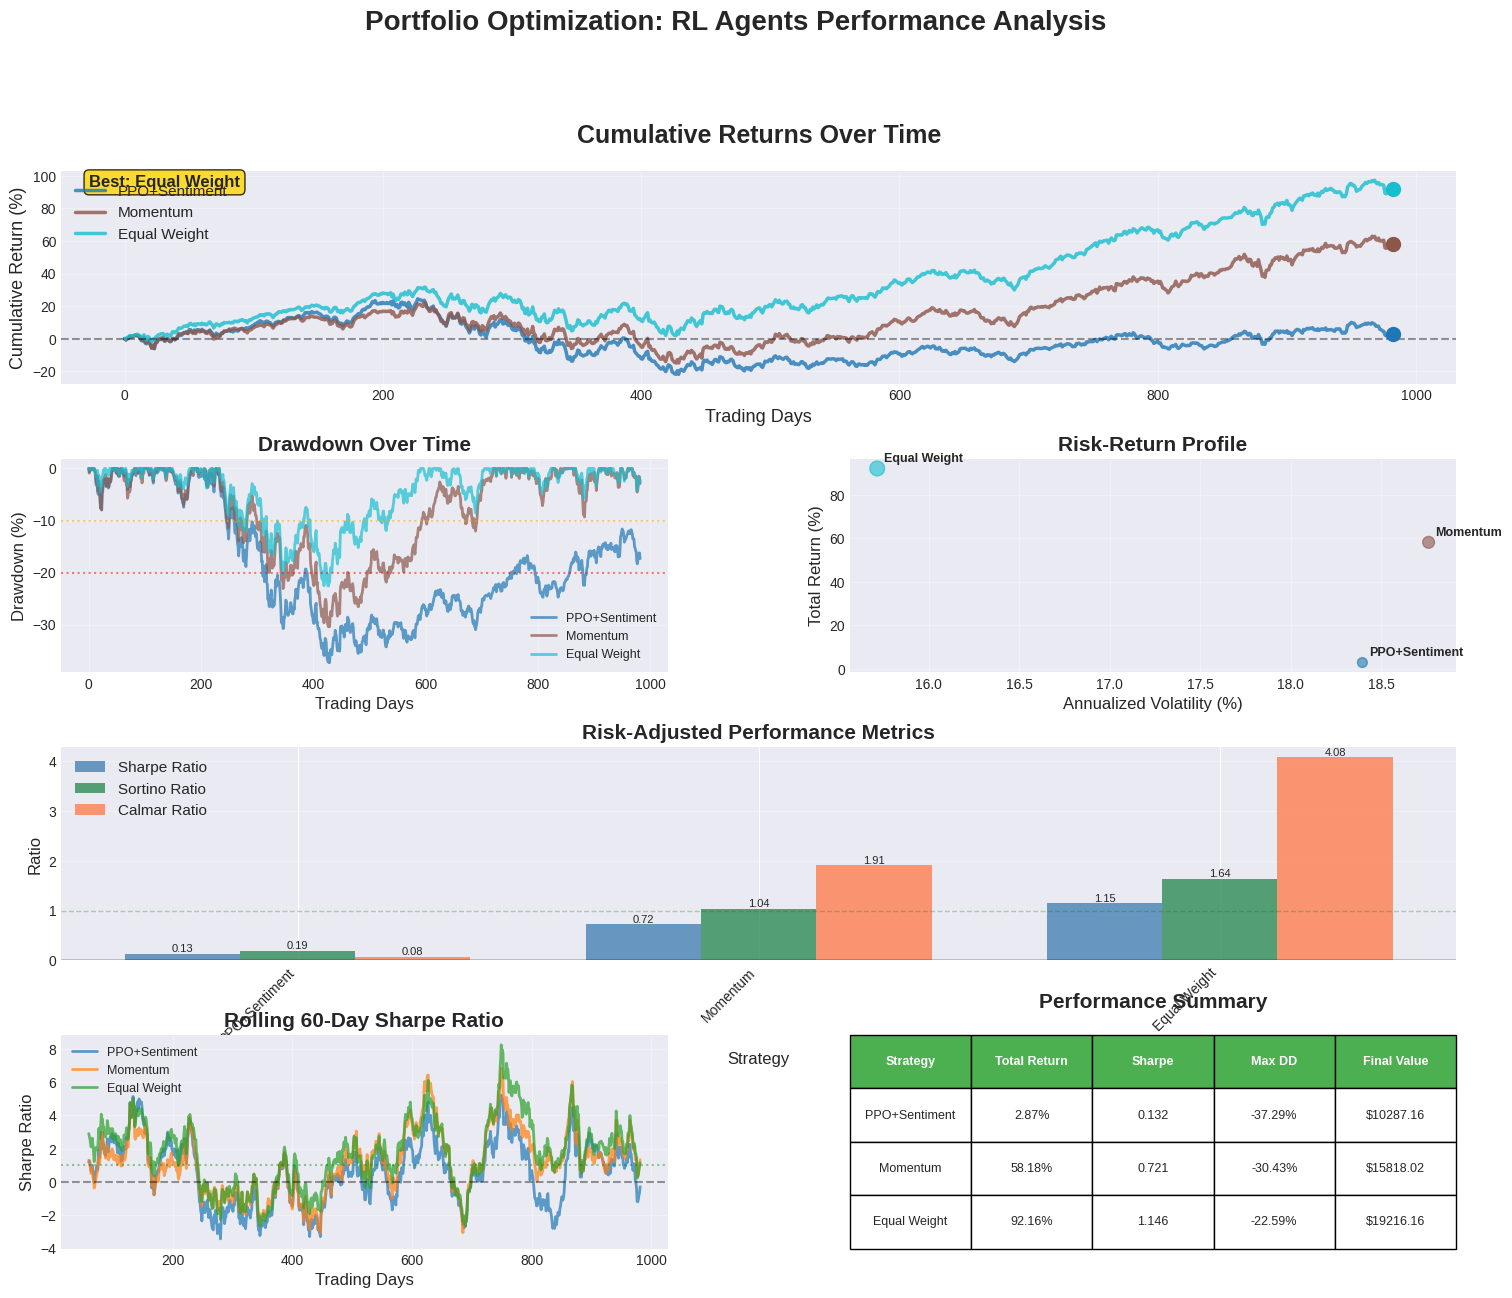


Visualization saved to /kaggle/working/results/comprehensive_analysis.png

KEY INSIGHTS

Best Total Return: Equal Weight
  Return: 92.16%

Best Risk-Adjusted: Equal Weight
  Sharpe: 1.146

All models trained and evaluated successfully!
Results saved to /kaggle/working/
Download the entire /kaggle/working folder to save your models and results.


In [13]:
# ============================================================================
# CELL 10: Comprehensive Visualization
# ============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')

fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(4, 2, hspace=0.35, wspace=0.3)

colors = plt.cm.tab10(np.linspace(0, 1, len(all_values)))

# 1. Cumulative Returns
ax1 = fig.add_subplot(gs[0, :])
for (name, values), color in zip(all_values.items(), colors):
    returns = ((np.array(values) / values[0]) - 1) * 100
    ax1.plot(returns, label=name, linewidth=2.5, color=color, alpha=0.8)
    final_return = returns[-1]
    ax1.scatter(len(returns)-1, final_return, s=100, color=color, zorder=5)

ax1.set_title('Cumulative Returns Over Time', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Trading Days', fontsize=13)
ax1.set_ylabel('Cumulative Return (%)', fontsize=13)
ax1.legend(loc='upper left', fontsize=11, framealpha=0.95)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.4, linewidth=1.5)

best_strategy = max(all_values.items(), key=lambda x: x[1][-1] / x[1][0])
ax1.text(0.02, 0.98, f'Best: {best_strategy[0]}',
         transform=ax1.transAxes, fontsize=12, fontweight='bold',
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))

# 2. Drawdown Analysis
ax2 = fig.add_subplot(gs[1, 0])
for (name, values), color in zip(all_values.items(), colors):
    values_arr = np.array(values)
    running_max = np.maximum.accumulate(values_arr)
    drawdown = ((values_arr - running_max) / running_max) * 100
    ax2.plot(drawdown, label=name, linewidth=2, color=color, alpha=0.7)

ax2.set_title('Drawdown Over Time', fontsize=15, fontweight='bold')
ax2.set_xlabel('Trading Days', fontsize=12)
ax2.set_ylabel('Drawdown (%)', fontsize=12)
ax2.legend(loc='lower right', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=-20, color='red', linestyle=':', alpha=0.5)
ax2.axhline(y=-10, color='orange', linestyle=':', alpha=0.5)

# 3. Risk-Return Scatter
ax3 = fig.add_subplot(gs[1, 1])
risk_return_data = []

for name in all_values.keys():
    values = np.array(all_values[name])
    returns_arr = np.diff(values) / values[:-1]
    vol = np.std(returns_arr) * np.sqrt(252) * 100
    total_ret = ((values[-1] / values[0]) - 1) * 100
    sharpe = float(results[name]['Sharpe Ratio'])
    
    risk_return_data.append({
        'name': name,
        'volatility': vol,
        'return': total_ret,
        'sharpe': sharpe
    })

df_rr = pd.DataFrame(risk_return_data)
sizes = (df_rr['sharpe'] * 100).clip(lower=50)

ax3.scatter(df_rr['volatility'], df_rr['return'],
           s=sizes, alpha=0.6, c=colors[:len(df_rr)])

for idx, row in df_rr.iterrows():
    ax3.annotate(row['name'],
                (row['volatility'], row['return']),
                fontsize=9, fontweight='bold',
                xytext=(5, 5), textcoords='offset points')

ax3.set_title('Risk-Return Profile', fontsize=15, fontweight='bold')
ax3.set_xlabel('Annualized Volatility (%)', fontsize=12)
ax3.set_ylabel('Total Return (%)', fontsize=12)
ax3.grid(True, alpha=0.3)

# 4. Performance Metrics Comparison
ax4 = fig.add_subplot(gs[2, :])

metrics_to_compare = []
for name, metrics in results.items():
    metrics_to_compare.append({
        'Strategy': name,
        'Sharpe': float(metrics['Sharpe Ratio']),
        'Sortino': float(metrics['Sortino Ratio']),
        'Calmar': float(metrics['Calmar Ratio'])
    })

df_metrics = pd.DataFrame(metrics_to_compare).set_index('Strategy')

x = np.arange(len(df_metrics))
width = 0.25

bars1 = ax4.bar(x - width, df_metrics['Sharpe'], width,
                label='Sharpe Ratio', alpha=0.8, color='steelblue')
bars2 = ax4.bar(x, df_metrics['Sortino'], width,
                label='Sortino Ratio', alpha=0.8, color='seagreen')
bars3 = ax4.bar(x + width, df_metrics['Calmar'], width,
                label='Calmar Ratio', alpha=0.8, color='coral')

ax4.set_title('Risk-Adjusted Performance Metrics', fontsize=15, fontweight='bold')
ax4.set_xlabel('Strategy', fontsize=12)
ax4.set_ylabel('Ratio', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(df_metrics.index, rotation=45, ha='right')
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.axhline(y=1.0, color='green', linestyle='--', alpha=0.3, linewidth=1)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax4.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom', fontsize=8)

# 5. Rolling Sharpe Ratio
ax5 = fig.add_subplot(gs[3, 0])

for name, values in all_values.items():
    values_arr = np.array(values)
    returns_arr = np.diff(values_arr) / values_arr[:-1]
    
    rolling_sharpe = []
    window = 60
    for i in range(window, len(returns_arr)):
        window_returns = returns_arr[i-window:i]
        sharpe = np.mean(window_returns) / (np.std(window_returns) + 1e-8) * np.sqrt(252)
        rolling_sharpe.append(sharpe)
    
    ax5.plot(range(window, len(returns_arr)), rolling_sharpe,
             label=name, linewidth=2, alpha=0.7)

ax5.set_title('Rolling 60-Day Sharpe Ratio', fontsize=15, fontweight='bold')
ax5.set_xlabel('Trading Days', fontsize=12)
ax5.set_ylabel('Sharpe Ratio', fontsize=12)
ax5.legend(loc='best', fontsize=9)
ax5.grid(True, alpha=0.3)
ax5.axhline(y=0, color='black', linestyle='--', alpha=0.4)
ax5.axhline(y=1.0, color='green', linestyle=':', alpha=0.4)

# 6. Summary Table
ax6 = fig.add_subplot(gs[3, 1])
ax6.axis('tight')
ax6.axis('off')

summary_data = []
for name, metrics in results.items():
    summary_data.append([
        name,
        metrics['Total Return'],
        metrics['Sharpe Ratio'],
        metrics['Max Drawdown'],
        metrics['Final Value']
    ])

table = ax6.table(cellText=summary_data,
                 colLabels=['Strategy', 'Total Return', 'Sharpe', 'Max DD', 'Final Value'],
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

for i in range(5):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

ax6.set_title('Performance Summary', fontsize=15, fontweight='bold', pad=20)

fig.suptitle('Portfolio Optimization: RL Agents Performance Analysis',
             fontsize=20, fontweight='bold', y=0.995)

plt.tight_layout()
plt.savefig(f'{WORKING_DIR}/results/comprehensive_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved to {WORKING_DIR}/results/comprehensive_analysis.png")

# Final Summary
print("\n" + "=" * 70)
print("KEY INSIGHTS")
print("=" * 70)

best_return = max(results.items(), key=lambda x: float(x[1]['Total Return'].strip('%')))
best_sharpe = max(results.items(), key=lambda x: float(x[1]['Sharpe Ratio']))

print(f"\nBest Total Return: {best_return[0]}")
print(f"  Return: {best_return[1]['Total Return']}")

print(f"\nBest Risk-Adjusted: {best_sharpe[0]}")
print(f"  Sharpe: {best_sharpe[1]['Sharpe Ratio']}")

print("\nAll models trained and evaluated successfully!")
print(f"Results saved to {WORKING_DIR}/")
print("Download the entire /kaggle/working folder to save your models and results.")